In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymc3 import  *
from src import load_clean_data as load
%matplotlib inline

In [21]:
df = load.load_all_data(2015)
df.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (13,14,19,20,193,194,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,perc_male,perc_white,perc_black,perc_hisp,perc_20_44,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,48.6,79.2,19.1,2.5,32.4,19410,333,514,1.715611,2.648120
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,48.8,88.2,10.0,4.5,29.4,69724,925,1429,1.326659,2.049509
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,53.7,48.7,47.3,4.7,33.6,11567,82,127,0.708913,1.097951
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,53.9,77.9,22.0,2.0,33.7,9508,119,184,1.251578,1.935212
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,49.6,96.8,2.1,8.5,30.2,21368,601,928,2.812617,4.342943


In [47]:
df_no_zero_outlier = df[((df.HIVincidence > 0) & (df.HIVincidence < 130))]
df_no_zero_outlier['log_household_income'] = np.log10(df_no_zero_outlier.household_income)
df_no_zero_outlier.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,perc_white,perc_black,perc_hisp,perc_20_44,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,log_household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,79.2,19.1,2.5,32.4,19410,333,514,1.715611,2.648120,4.307582
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,88.2,10.0,4.5,29.4,69724,925,1429,1.326659,2.049509,4.863668
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,96.8,2.1,8.5,30.2,21368,601,928,2.812617,4.342943,4.320852
5,1011,Bullock County,AL,2015,0.0,8.0,90.7,691.4,0.0,0.0,...,27.1,72.0,4.0,35.2,4597,73,113,1.587992,2.458125,3.573568
7,1015,Calhoun County,AL,2015,0.0,10.0,10.3,211.2,5.0,0.0,...,76.9,21.6,3.4,32.4,43018,692,1070,1.608629,2.487331,4.656558


In [48]:
df_no_zero_outlier.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'unemployment_rate', 'poverty_rate',
       'household_income', 'perc_male', 'perc_white', 'perc_black',
       'perc_hisp', 'perc_20_44', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'log_household_income'],
      dtype='object')

In [349]:
from sklearn.preprocessing import StandardScaler

X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

In [352]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC



model1_bic = LassoLarsIC(criterion='bic')
model1_bic.fit(X, y)
alpha_bic_ = model1_bic.alpha_
model1_bic_coef = model1_bic.coef_
model1_bic_inter = model1_bic.intercept_
bic = model1_bic.criterion_.min()

model1_aic = LassoLarsIC(criterion='aic')
model1_aic.fit(X, y)
alpha_aic_ = model1_aic.alpha_
model1_aic_coef = model1_aic.coef_
aic = model1_aic.criterion_.min()

alpha_bic_, alpha_aic_, bic, aic, model1_bic_coef, model1_bic_inter, model1_aic_coef

(0.0,
 0.0,
 269.71329083194649,
 251.25438843113145,
 array([ 6.55025419,  4.13770994,  2.36180928, -1.76623558]),
 15.999865951742626,
 array([ 6.55025419,  4.13770994,  2.36180928, -1.76623558]))

Text(0.5,1,'Information-criterion for model selection')

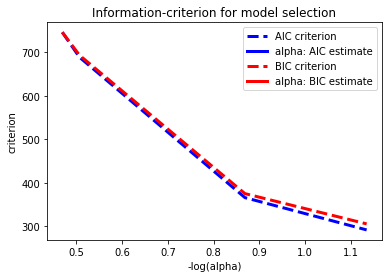

In [351]:
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model1_aic, 'AIC', 'b')
plot_ic_criterion(model1_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

In [138]:
def score_model(data, model_list, features, target_col):
    # define and scale the feature matrix
    X = data[features].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # define the target vector
    y = df_no_zero_outlier.HIVincidence.values
    
    # iterate the list of models to populate the score vector
    score = [features]
    for model in model_list:
        model.fit(X, y)
        score.append(round(model.criterion_.min(), 2))
    
    return score


def model_selection(data, features_list, target_col):
    # Instanciate the models for bic and aic scoring
    model_bic = LassoLarsIC(criterion='bic')
    model_aic = LassoLarsIC(criterion='aic')
    model_lst = [model_bic, model_aic]
    
    # iterate the features list to populate the scores list
    score_lst = []
    for features in features_list:
        score = score_model(data, model_lst, features, target_col)
        score_lst.append(score)
        
    # turn scores list into a pandas df
    score_df = pd.DataFrame(score_lst, columns=['Features', "BIC", 'AIC'])
    score_df['Features'] = score_df['Features'].apply(lambda x: ' + '.join(x))
    score_df['num_features'] = [len(x) for x in score_df.Features]
    
    return score_df
       

In [151]:
features_list = [['HIVprevalence'], ['perc_black'], ['HIVprevalence', 'perc_black'], ['HIVprevalence', 'perc_white'], 
                  ['HIVprevalence', 'perc_black', 'perc_white'],
                  ['HIVprevalence', 'perc_black', 'pctunins'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'poverty_rate'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'poverty_rate', 'pctunmetneed'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'pctunmetneed'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'drugdep'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'nonmedpain'], 
                  ['HIVprevalence','perc_black','pctunins','poverty_rate','drugdep','nonmedpain'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm12month'],
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap', 'partD30dayrxrate'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', '%msm5yr', 'perc_20_44', 'Med_MH_fac', 'Med_SMAT_fac', 'mme_percap', 'partD30dayrxrate', 'bup_phys'], 
                  ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income', 'perc_20_44', 'mme_percap']]

df = model_selection(df_no_zero_outlier, features_list, target_col='HIVincidence')

df

,Features,BIC,AIC,num_features
0,HIVprevalence,378.82,374.20,13
1,perc_black,405.05,400.43,10
2,HIVprevalence + perc_black,299.28,290.05,26
3,HIVprevalence + perc_white,327.24,318.01,26
4,HIVprevalence + perc_black + perc_white,305.77,291.92,39
5,HIVprevalence + perc_black + pctunins,273.82,259.97,37
6,HIVprevalence + perc_black + pctunins + poverty_rate,273.85,260.01,52
7,HIVprevalence + perc_black + pctunins + poverty_rate + pctunmetneed,274.53,260.69,67
8,HIVprevalence + perc_black + pctunins + pctunmetneed,274.53,260.69,52
9,HIVprevalence + perc_black + pctunins + drugdep,275.06,260.88,47


In [144]:
lowest = df[df.BIC == df.BIC.min()]
lowest)

,Features,BIC,AIC,num_features
11,HIVprevalence + perc_black + pctunins + log_household_income,269.71,251.25,60


In [333]:
from pymc3.glm import GLM
X = df_no_zero_outlier[['HIVprevalence']].values


# scaler = StandardScaler()
# X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

data = dict(x=X, y=y)

with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    GLM.from_formula('y ~ 1 + x', data)
    trace = sample(1000, n_init=50000, tune=1000, njobs=4) # draw 3000 posterior samples using NUTS sampling

100%|██████████| 2000/2000 [00:10<00:00, 188.59it/s]


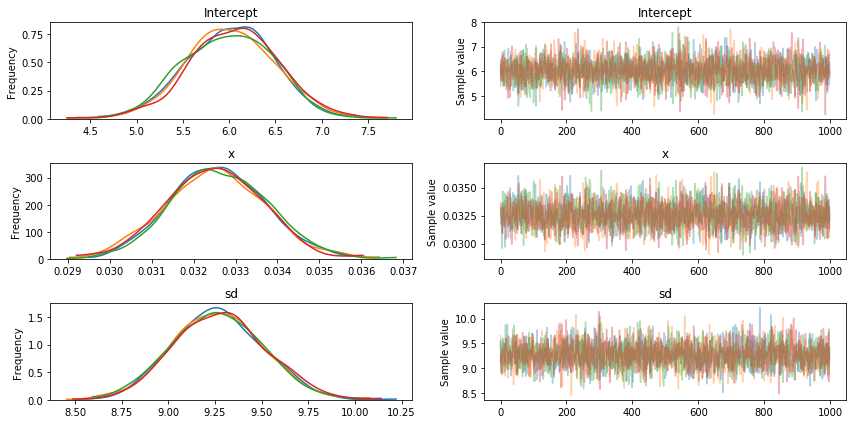

In [334]:
from pymc3 import traceplot  
traceplot(trace)
plt.tight_layout();

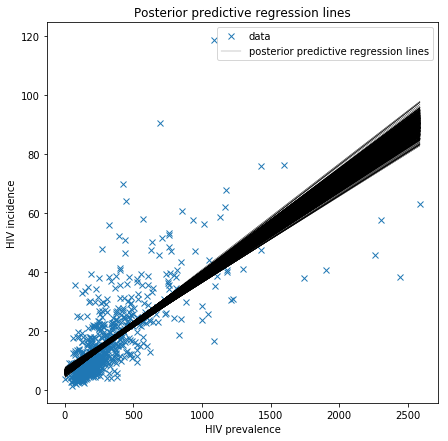

In [335]:
plt.figure(figsize=(7, 7))
plt.plot(X, y, 'x', label='data')
plot_posterior_predictive_glm(trace, eval=X, samples=1000, label='posterior predictive regression lines')
plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('HIV prevalence')
plt.ylabel('HIV incidence');

In [354]:
X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income']].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

data = dict(x1=X[:,0], x2=X[:,1], x3=X[:,2], x4=X[:,3], y=y)

with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    GLM.from_formula('y ~ 1 + x1 + x2 + x3 +x4', data)
    trace = sample(1000, n_init=50000, tune=1000, njobs=4) # draw 3000 posterior samples using NUTS sampling

100%|██████████| 2000/2000 [00:12<00:00, 156.33it/s]


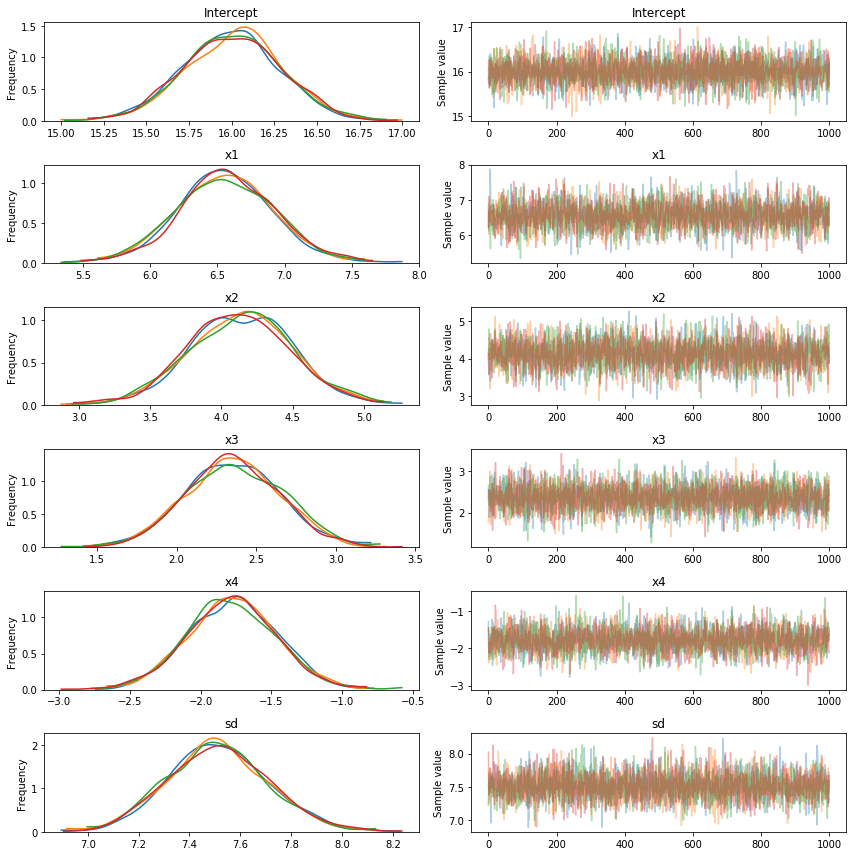

In [478]:
 traceplot(trace)
plt.tight_layout();

In [356]:
intercept, b1, b2, b3, b4 = trace['Intercept'].mean(), trace['x1'].mean(), trace['x2'].mean(), trace['x3'].mean(), trace['x4'].mean()
intercept, b1, b2, b3, b4

(16.003856496141015,
 6.5601173146039535,
 4.1289598562615115,
 2.356315085080865,
 -1.778792311374954)

In [281]:
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform

X = df_no_zero_outlier[['HIVprevalence']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value

with Model() as pooled_model:

    intercept = Normal('intercept', 0, sd=1e5)
    slope = Normal('slope', 0, sd=1e5)
    
    sigma = HalfCauchy('sigma', 5)

    theta = intercept + slope*X

    y = Normal('y', theta, sd=sigma, observed=y)


In [282]:
with pooled_model:
    pooled_trace = sample(1000, n_init=50000, tune=1000)

100%|██████████| 2000/2000 [06:31<00:00,  5.10it/s]/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.892086859125, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))



In [254]:
b0, b1 = pooled_trace['intercept'].mean(axis=0), pooled_trace['slope'].mean(axis=0)
b0, b1

(15.999594613621939, 0.00041276790385570597)

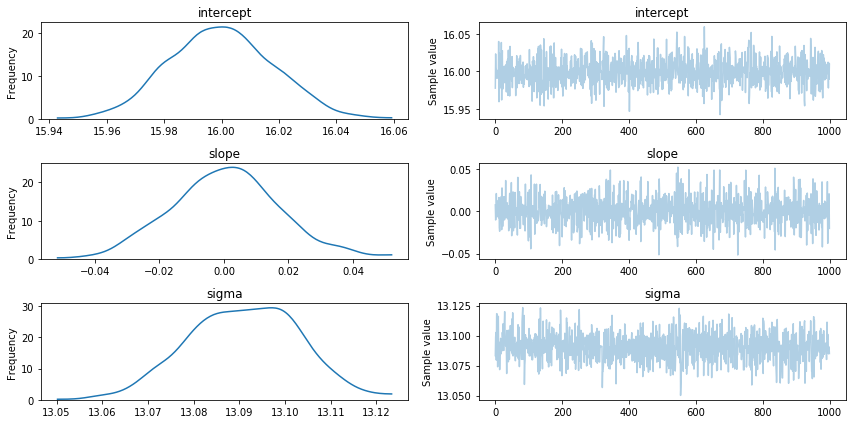

In [255]:
from pymc3 import traceplot  
traceplot(pooled_trace);

In [150]:
from pymc3 import summary  
summary(pooled_trace) 


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.999            0.523            0.023            [4.867, 6.913]
  0.559            0.022            0.001            [0.523, 0.607]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  4.952          5.652          6.009          6.357          7.029
  0.515          0.543          0.559          0.575          0.602


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  9.596            0.255            0.009            [9.089, 10.072]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  9.105          9.419          9.589  

Text(0,0.5,'HIV incidence')

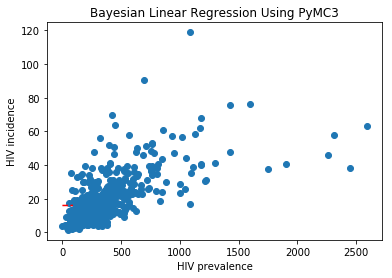

In [280]:
plt.scatter(df_no_zero_outlier[['HIVprevalence']].values, df_no_zero_outlier.HIVincidence.values)
xvals = np.linspace(0, 90)
plt.plot(xvals, b1*xvals+b0, 'r--');
plt.title('Bayesian Linear Regression Using PyMC3')
plt.xlabel('HIV prevalence')
plt.ylabel('HIV incidence')

In [155]:
HIV_incidence_pred = b0 + b1*perc_black
resid = HIV_incidence_pred - HIV_incidence
sum_resid_square = np.power(resid, 2).sum()
rmse = np.sqrt(sum_resid_square/len(perc_black))
print('Model RMSE is {}'.format(rmse))

Model RMSE is 9.56715807400747


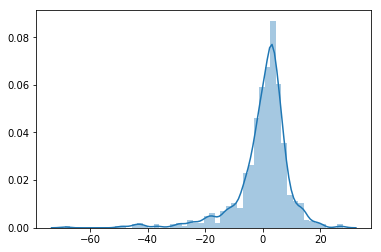

In [156]:
sns.distplot(resid);

In [158]:
import scipy.stats as stats
stats.normaltest(resid)

NormaltestResult(statistic=373.81257828113485, pvalue=6.7240354315251757e-82)

In [159]:
stats.shapiro(resid)

(0.8310329914093018, 2.4014289513328226e-27)

In [160]:
from sklearn.preprocessing import StandardScaler

X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

HIV_incidence = df_no_zero_outlier.HIVincidence.values # target value

with Model() as pooled_model_X:

    beta = Normal('beta', 0, sd=1e5, shape=X.shape[1]+1)
    sigma = HalfCauchy('sigma', 5)
    
    #theta = beta[0] + X.dot(beta.T[1:])
    theta = beta[0] + beta[1] * X[:,0] + beta[2] * X[:,1] + beta[3] * X[:,2] + beta[4] * X[:,3]
    y = Normal('y', theta, sd=sigma, observed=HIV_incidence)


In [161]:
with pooled_model_X:
    pooled_X_trace = sample(1000, n_init=50000, tune=1000)

100%|██████████| 2000/2000 [00:05<00:00, 390.44it/s]


In [162]:
b0, b1, b2, b3, b4 = pooled_X_trace['beta'].mean(axis=0)
b0, b1, b2, b3, b4

(15.986696794447353,
 6.5363824656596181,
 4.1560885216874999,
 2.366121198467527,
 -1.7557289414066122)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c31aed940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c2e95ea20>]], dtype=object)

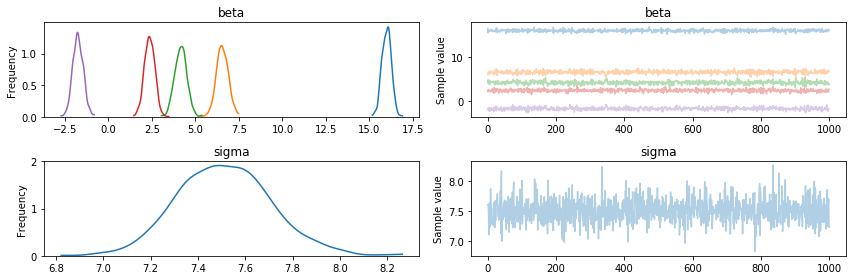

In [479]:
traceplot(pooled_X_trace)

In [482]:
beta_arr = pooled_X_trace['beta'].mean(axis=0)
HIV_incidence_pred = beta_arr[0] + X.dot(beta_arr.T[1:])
pooled_resid = HIV_incidence_pred - HIV_incidence
pooled_sum_resid_square = np.power(pooled_resid, 2).sum()
pooled_rmse = np.sqrt(pooled_sum_resid_square/len(df_no_zero_outlier.HIVincidence.values))
print('Pooled Model RMSE is {}'.format(pooled_rmse))

Pooled Model RMSE is 7.475432751585583


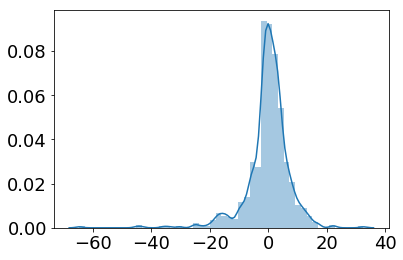

In [532]:
sns.distplot(pooled_resid);

In [166]:
stats.shapiro(resid)

(0.8522228598594666, 8.007619813119187e-26)

In [167]:
stats.normaltest(resid)

NormaltestResult(statistic=385.24153674019408, pvalue=2.2174977962522607e-84)

In [168]:
betas_df = pd.DataFrame(beta_arr.T, index=['intercept',
                                           'HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income'])
betas_df

,0
intercept,15.986697
HIVprevalence,6.536382
perc_black,4.156089
pctunins,2.366121
log_household_income,-1.755729


In [169]:
from pymc3 import summary  
summary(pooled_X_trace) 


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  15.987           0.268            0.008            [15.490, 16.495]
  6.536            0.343            0.012            [5.906, 7.270]
  4.156            0.348            0.013            [3.468, 4.794]
  2.366            0.298            0.010            [1.722, 2.880]
  -1.756           0.301            0.010            [-2.341, -1.144]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  15.490         15.802         15.995         16.165         16.495
  5.844          6.311          6.528          6.772          7.223
  3.497          3.921          4.159          4.385          4.849
  1.756          2.162          2.362          2.572          2.948
  -2.321         -1.971         -1.763         -1.548         -1.121


sig

In [534]:
us_states = df_no_zero_outlier.STATEABBREVIATION.unique()
states = len(us_states)
state_lookup = dict(zip(us_states, range(len(us_states))))
state = df_no_zero_outlier['state_code'] = df_no_zero_outlier.STATEABBREVIATION.replace(state_lookup).values

In [546]:
X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_no_zero_outlier.HIVincidence.values # target value


with Model() as unpooled_model:

    intercept = Normal('intercept', 0, sd=1e5, shape=states)
    beta1 = Normal('beta1', 0, sd=1e5)
    beta2 = Normal('beta2', 0, sd=1e5)
    beta3 = Normal('beta3', 0, sd=1e5)
    beta4 = Normal('beta4', 0, sd=1e5)
    
    sigma = HalfCauchy('sigma', 5)

    theta = intercept[state] + beta1 * X[:,0] + beta2 * X[:,1] + beta3 * X[:,2] + beta4 * X[:,3]
    y = Normal('y', theta, sd=sigma, observed=y)

In [547]:
with unpooled_model:
    unpooled_trace = sample(1000, n_init=50000, tune=1000)

100%|██████████| 2000/2000 [00:07<00:00, 253.95it/s]


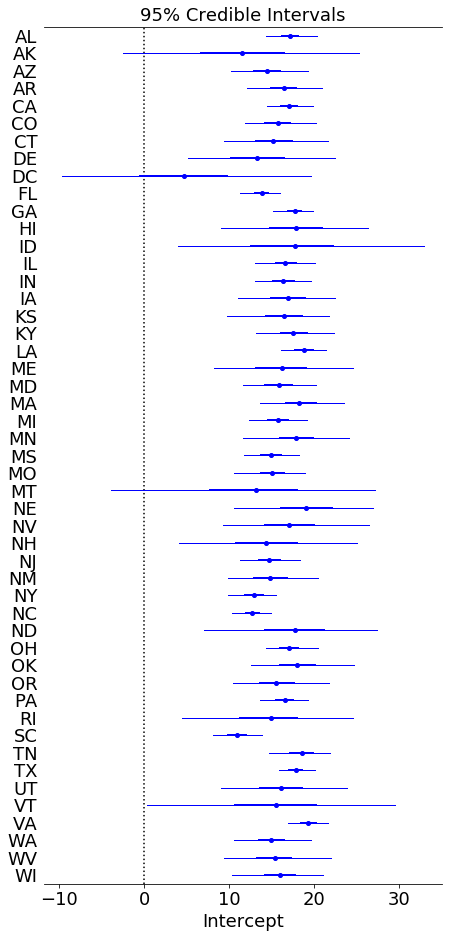

In [549]:
from pymc3 import forestplot

plt.figure(figsize=(6,14))
forestplot(unpooled_trace, varnames=['intercept'], ylabels=us_states, xtitle='Intercept');


In [548]:
X.shape

(746, 4)

In [550]:
summary(unpooled_trace) 


intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  17.165           1.475            0.040            [14.327, 20.291]
  11.552           7.387            0.250            [-2.468, 25.250]
  14.467           2.320            0.064            [10.206, 19.240]
  16.387           2.277            0.060            [12.127, 20.879]
  17.073           1.401            0.043            [14.480, 19.798]
  15.704           2.144            0.056            [11.872, 20.226]
  15.229           3.184            0.085            [9.435, 21.629]
  13.300           4.537            0.111            [5.175, 22.391]
  4.605            7.596            0.234            [-9.584, 19.643]
  13.825           1.223            0.033            [11.234, 15.992]
  17.691           1.196            0.034            [15.105, 19.837]
  17.868           4.377            0.113            [8.990, 26.299]
  17.59

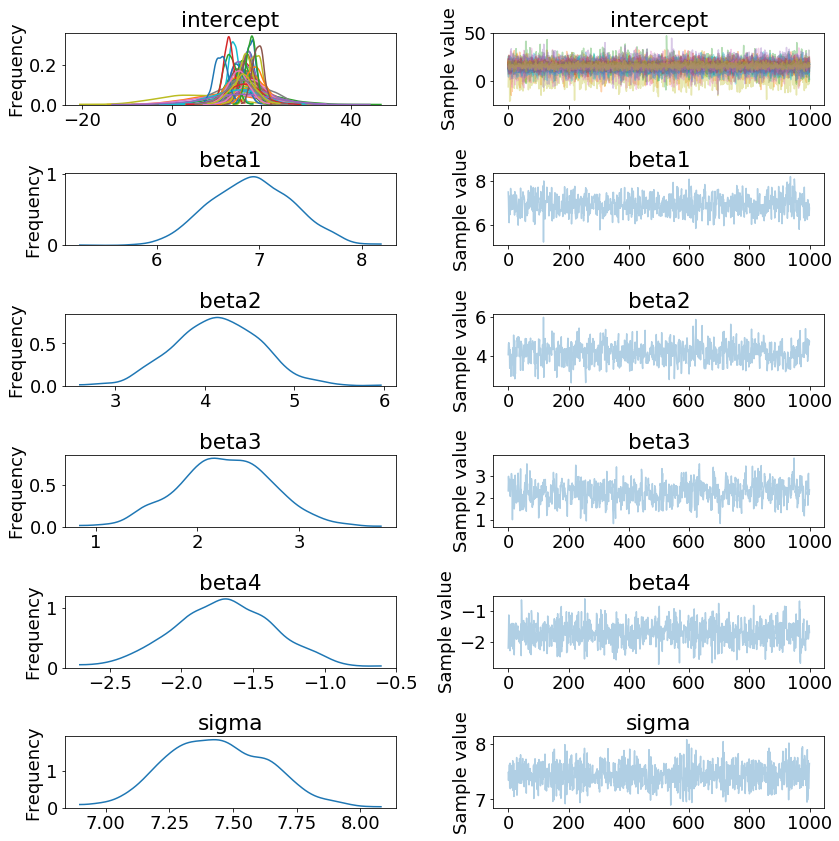

In [551]:
traceplot(unpooled_trace)
plt.tight_layout();

In [182]:
avg = multi_trace_4f[name].mean(axis=0)

[ 7.73005702  5.0393124   3.13309441 -1.05397174]
[ 6.14520536  3.10936301  1.40241325 -2.33234416]


In [397]:
import pymc3
#pooled_perc_black = pymc3.stats.waic(model=pooled_model_perc_black, trace=pooled_X_trace)

#pooled_model_perc_black

#print(round(pooled_perc_black[0], 2), round(pooled_perc_black[1], 2))


/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:220: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


5143.71 109.1
5295.42 117.58


/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:220: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [184]:
pooled_perc_black_loo = pymc3.stats.loo(model=pooled_model_perc_black, trace=pooled_X_trace)
pooled_loo = pymc3.stats.loo(model=pooled_model_X, trace=pooled_X_trace)
unpooled_loo = pymc3.stats.loo(model=unpooled_model, trace=unpooled_trace)

print(round(pooled_perc_black_loo[0], 2), round(pooled_perc_black[1], 2))
print(round(pooled_loo[0], 2), round(pooled[1], 2))
print(round(unpooled_loo[0], 2), round(unpooled[1], 2))

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:285: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is
        because importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")


nan 352001.94
5149.12 109.1
5173.84 104.37


In [221]:
multi_loo = pymc3.stats.loo(model=multi_model, trace=multi_trace)
print(round(multi_loo[0], 2), round(multi_loo[1], 2))

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:285: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is
        because importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")


5822.81 102.03


In [222]:
multi_trace['beta1'].shape

(1000, 49, 4)

In [227]:
multi_trace['beta1'][:, 10, :].mean(axis=0)

array([ 0.04418554,  2.25100186, -0.13868075, -1.08591921])

In [403]:
from pymc3 import HalfNormal, StudentT
from sklearn.preprocessing import StandardScaler

X = df_no_zero_outlier['HIVprevalence'].values

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

HIV_incidence = df_no_zero_outlier.HIVincidence.values # target value

with Model() as multi_model:
    #set intercept hyper priors
    mu_intercept = Normal('mu_intercep', mu=0., sd=1e5)
    sigma_intercept = HalfCauchy('sigma_intercep', 5)
    
    #set slope hyper priors
    mu_beta = Normal('mu_beta', mu=0., sd=1e5)
    sigma_beta = HalfCauchy('sigma_beta', 5)
    
    
    intercept = Normal('beta0', mu=mu_intercept, sd=sigma_intercept, shape=states)
    beta = Normal('beta1', mu=mu_beta, sd=sigma_beta, shape=states)
    
    sigma = HalfCauchy('sigma', 5)

    theta = intercept[state] + beta[state] * X
    y = Normal('y', theta, sd=sigma, observed=HIV_incidence)
    multi_trace = sample(1000, n_init=150000, tune=50000)

100%|██████████| 51000/51000 [04:28<00:00, 190.28it/s]/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.694759968235, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 16 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))



In [372]:
with multi_model:
    multi_trace = sample(1000, n_init=150000, tune=50000)

100%|█████████▉| 50993/51000 [04:12<00:00, 201.66it/s]/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 51000/51000 [04:12<00:00, 201.65it/s]


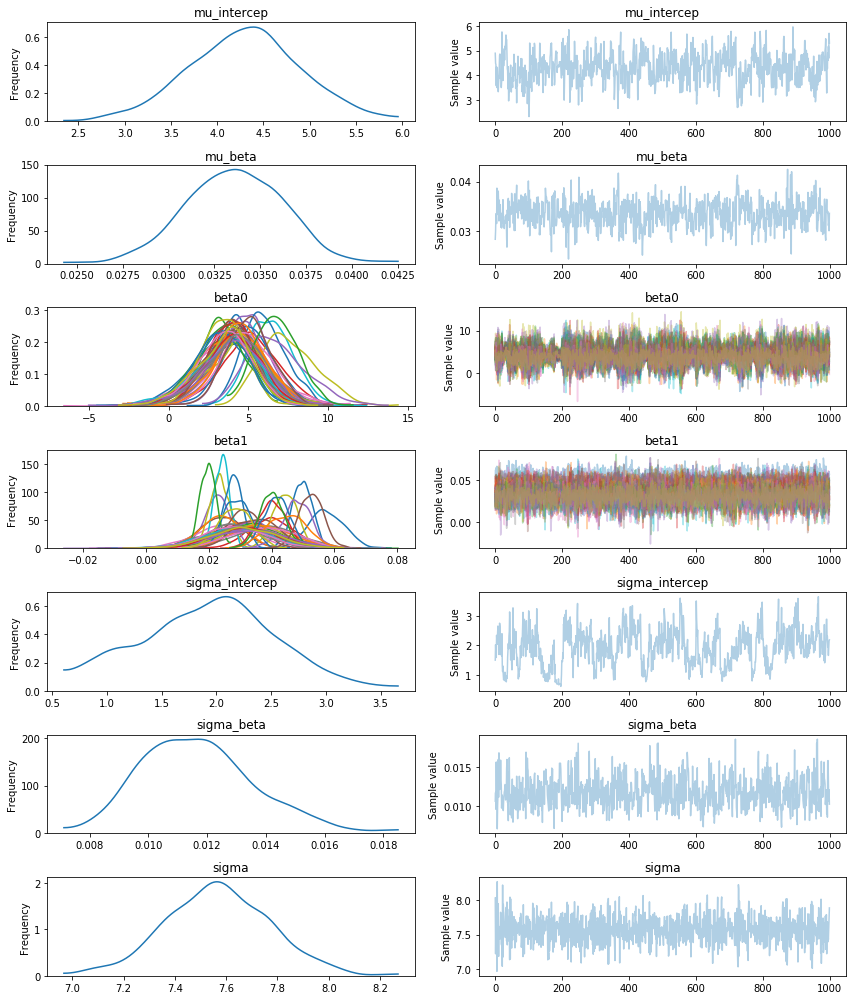

In [373]:
traceplot(multi_trace);

In [456]:
from pymc3 import HalfNormal, StudentT
from sklearn.preprocessing import StandardScaler

X = df_no_zero_outlier[['HIVprevalence', 
                             'perc_black', 
                             'pctunins', 
                             'log_household_income']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

HIV_incidence = df_no_zero_outlier.HIVincidence.values # target value


# scaler = StandardScaler()
# X = scaler.fit_transform(X)

HIV_incidence = df_no_zero_outlier.HIVincidence.values # target value

with Model() as multi_model_4f:
    #set intercept hyper priors
    mu_intercept = Normal('mu_intercep', mu=0., sd=1e5)
    sigma_intercept = HalfCauchy('sigma_intercep', 5)
    
    #set beta1 hyper priors
    mu_beta1 = Normal('mu_beta1', mu=0., sd=1e5)
    sigma_beta1 = HalfCauchy('sigma_beta1', 5)
    
    #set beta2 hyper priors
    mu_beta2 = Normal('mu_beta2', mu=0., sd=1e5)
    sigma_beta2 = HalfCauchy('sigma_beta2', 5)
    
    #set beta3 hyper priors
    mu_beta3 = Normal('mu_beta3', mu=0., sd=1e5)
    sigma_beta3 = HalfCauchy('sigma_beta3', 5)
    
    #set beta4 hyper priors
    mu_beta4 = Normal('mu_beta4', mu=0., sd=1e5)
    sigma_beta4 = HalfCauchy('sigma_beta4', 5)
    
    intercept = Normal('intercept', mu=mu_intercept, sd=sigma_intercept, shape=states)
    beta1 = Normal('beta1', mu=mu_beta1, sd=sigma_beta1, shape=states)
    beta2 = Normal('beta2', mu=mu_beta2, sd=sigma_beta2, shape=states)
    beta3 = Normal('beta3', mu=mu_beta3, sd=sigma_beta3, shape=states)
    beta4 = Normal('beta4', mu=mu_beta3, sd=sigma_beta4, shape=states)
    
    sigma = HalfCauchy('sigma', 5)

    HIV_like = intercept[state] + beta1[state] * X[:,0] + beta2[state] * X[:,1] + beta3[state] * X[:,2] + beta4[state] * X[:,3]
    y = Normal('y', HIV_like, sd=sigma, observed=HIV_incidence)

In [391]:
with multi_model_4f:
    multi_trace_4f = sample(1000, n_init=150000, tune=50000)

100%|█████████▉| 50996/51000 [15:05<00:00, 56.32it/s]/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 7 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 51000/51000 [15:05<00:00, 56.32it/s]


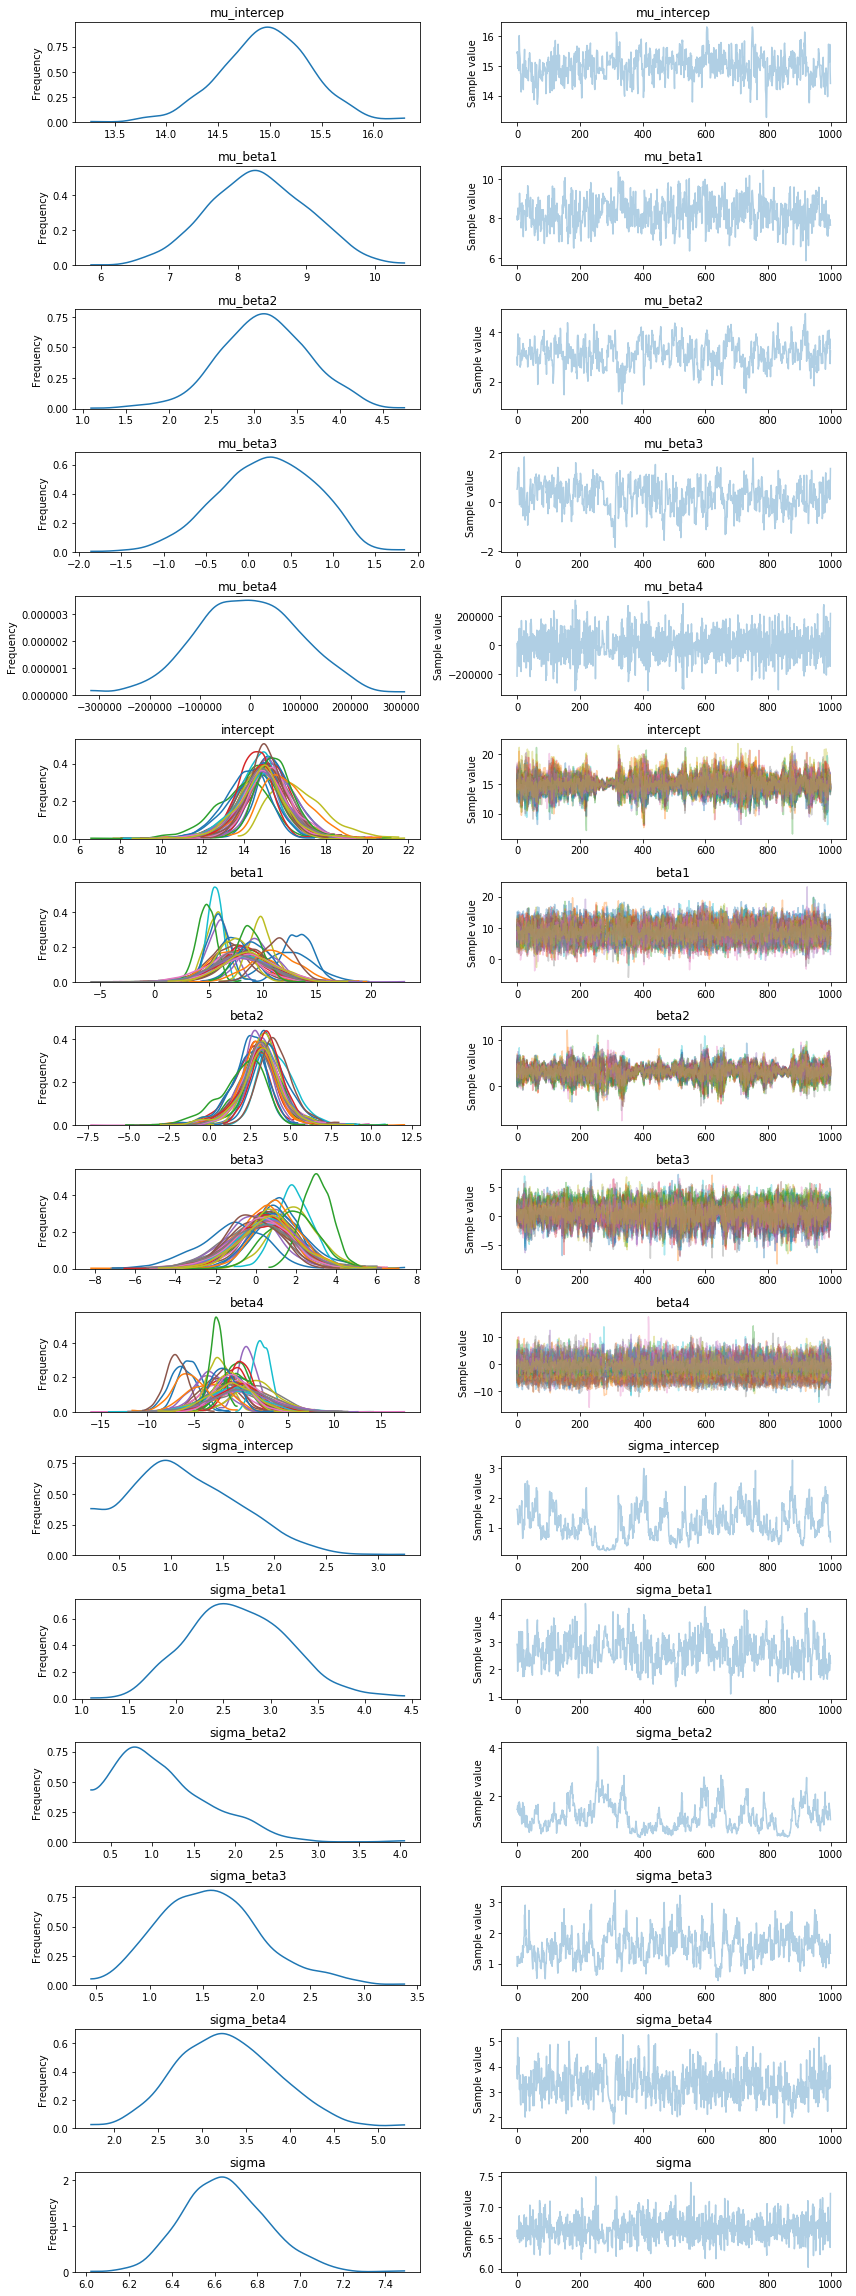

In [392]:
traceplot(multi_trace_4f);

In [399]:
pooled = pymc3.stats.waic(model=pooled_model_X, trace=pooled_X_trace)
unpooled = pymc3.stats.waic(model=unpooled_model, trace=unpooled_trace)
multi = pymc3.stats.waic(model=multi_model_4f, trace=multi_trace_4f)

print('WAIC for the pooled model is {} ({})'.format(round(pooled[0], 2), round(pooled[1], 2)))
print('WAIC for the unpooled model is {} ({})'.format(round(unpooled[0], 2), round(unpooled[1], 2)))
print('WAIC for the multilevel model is {} ({})'.format(round(multi[0], 2), round(multi[1], 2)))

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:220: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC for the pooled model is 5143.71 (109.1)
WAIC for the unpooled model is 5295.42 (117.58)
WAIC for the multilevel model is 5066.49 (102.36)


In [402]:
pooled_loo = pymc3.stats.loo(model=pooled_model_X, trace=pooled_X_trace)
unpooled_loo = pymc3.stats.loo(model=unpooled_model, trace=unpooled_trace)
multi_loo = pymc3.stats.loo(model=multi_model_4f, trace=multi_trace_4f)
print('LOO for the pooled model is {} ({})'.format(round(pooled_loo[0], 2), round(pooled_loo[1], 2)))
print('LOO for the unpooled model is {} ({})'.format(round(unpooled_loo[0], 2), round(unpooled_loo[1], 2)))
print('LOO for the multilevel model is {} ({})'.format(round(multi_loo[0], 2), round(multi_loo[1], 2)))

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/pymc3/stats.py:285: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is
        because importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")


LOO for the pooled model is 5149.12 (110.41)
LOO for the unpooled model is 5304.53 (119.12)
LOO for the multilevel model is 5092.1 (103.67)


In [404]:
summary(multi_trace_4f)


mu_intercep:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  14.965           0.432            0.025            [14.180, 15.849]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  14.105         14.691         14.974         15.255         15.779


mu_beta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  8.300            0.718            0.041            [6.886, 9.652]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6.889          7.792          8.290          8.800          9.694


mu_beta2:

  Mean             SD               MC Error         95% HPD interval
  ----------

In [512]:
lst = []
for name in multi_trace_4f.varnames:
    avg = multi_trace_4f[name].mean(axis=0)
    lower = np.percentile(multi_trace_4f[name], 2.5, axis=0)
    upper = np.percentile(multi_trace_4f[name], 97.5, axis=0)
    if type(avg) == np.ndarray:
        lst.append(avg)
        lst.append(lower)
        lst.append(upper)

In [555]:
coeff_df = pd.DataFrame(lst)
coeff_df = coeff_df.T
coeff_df.columns = ['intercept_mean', 'intercept_lower', 'intercept_upper',
                    'HIVprevalence_beta_mean', 'HIVprevalence_beta_lower', 'HIVprevalence_beta_upper',
                    'perc_black_beta_mean', 'perc_black_beta_lower', 'perc_black_beta_upper',
                    'pctunins_beta_mean', 'pctunins_beta_lower', 'pctunins_beta_upper',
                    'log_household_income_beta_mean', 'log_household_income_beta_lower', 'log_household_income_beta_upper']
coeff_df['state'] =  us_states
coeff_df.to_csv('output_tables/multimodel_coeff.csv')

In [556]:
df_new = pd.DataFrame(X)
df_new.columns = ['HIVprevalence', 'perc_black', 'pctunins', 'log_household_income']
df_new['state'] = df_no_zero_outlier.STATEABBREVIATION.values
df_new.head()

,HIVprevalence,perc_black,pctunins,log_household_income,state
0,-0.284378,0.077720,-0.639098,-0.977629,AL
1,-0.500774,-0.492544,-0.039521,0.140330,AL
2,-0.741409,-0.987609,-0.328972,-0.950949,AL
3,1.352293,3.392771,1.014907,-2.453293,AL
4,-0.334612,0.234386,-0.266947,-0.276045,AL


In [557]:
merge_df = pd.merge(df_new, coeff_df, how='left', on='state')
merge_df.head()

,HIVprevalence,perc_black,pctunins,log_household_income,state,intercept_mean,intercept_lower,intercept_upper,HIVprevalence_beta_mean,HIVprevalence_beta_lower,HIVprevalence_beta_upper,perc_black_beta_mean,perc_black_beta_lower,perc_black_beta_upper,pctunins_beta_mean,pctunins_beta_lower,pctunins_beta_upper,log_household_income_beta_mean,log_household_income_beta_lower,log_household_income_beta_upper
0,-0.284378,0.077720,-0.639098,-0.977629,AL,15.243598,13.278229,17.149901,12.522004,8.479018,16.838716,3.4238,1.540646,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946
1,-0.500774,-0.492544,-0.039521,0.140330,AL,15.243598,13.278229,17.149901,12.522004,8.479018,16.838716,3.4238,1.540646,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946
2,-0.741409,-0.987609,-0.328972,-0.950949,AL,15.243598,13.278229,17.149901,12.522004,8.479018,16.838716,3.4238,1.540646,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946
3,1.352293,3.392771,1.014907,-2.453293,AL,15.243598,13.278229,17.149901,12.522004,8.479018,16.838716,3.4238,1.540646,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946
4,-0.334612,0.234386,-0.266947,-0.276045,AL,15.243598,13.278229,17.149901,12.522004,8.479018,16.838716,3.4238,1.540646,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946


In [558]:
merge_df['pred'] = merge_df.intercept_mean + merge_df.HIVprevalence * merge_df.HIVprevalence_beta_mean + merge_df.perc_black * merge_df.perc_black_beta_mean + merge_df.pctunins * merge_df.pctunins_beta_mean + merge_df.log_household_income * merge_df.log_household_income_beta_mean
merge_df['actual'] = df_no_zero_outlier.HIVincidence.values
merge_df['county_code'] = df_no_zero_outlier.county_code.values
merge_df.to_csv('output_tables/multimodel_table.csv')
merge_df.head()

,HIVprevalence,perc_black,pctunins,log_household_income,state,intercept_mean,intercept_lower,intercept_upper,HIVprevalence_beta_mean,HIVprevalence_beta_lower,...,perc_black_beta_upper,pctunins_beta_mean,pctunins_beta_lower,pctunins_beta_upper,log_household_income_beta_mean,log_household_income_beta_lower,log_household_income_beta_upper,pred,actual,county_code
0,-0.284378,0.077720,-0.639098,-0.977629,AL,15.243598,13.278229,17.149901,12.522004,8.479018,...,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946,17.238827,10.9,1001
1,-0.500774,-0.492544,-0.039521,0.140330,AL,15.243598,13.278229,17.149901,12.522004,8.479018,...,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946,6.359471,8.7,1003
2,-0.741409,-0.987609,-0.328972,-0.950949,AL,15.243598,13.278229,17.149901,12.522004,8.479018,...,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946,8.098032,10.4,1009
3,1.352293,3.392771,1.014907,-2.453293,AL,15.243598,13.278229,17.149901,12.522004,8.479018,...,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946,60.414453,90.7,1011
4,-0.334612,0.234386,-0.266947,-0.276045,AL,15.243598,13.278229,17.149901,12.522004,8.479018,...,5.35044,1.277781,-1.441351,4.44098,-6.246479,-9.023618,-3.489946,13.239277,10.3,1015


In [562]:
merge_df.county_code()

,HIVprevalence,perc_black,pctunins,log_household_income,intercept_mean,intercept_lower,intercept_upper,HIVprevalence_beta_mean,HIVprevalence_beta_lower,HIVprevalence_beta_upper,...,perc_black_beta_upper,pctunins_beta_mean,pctunins_beta_lower,pctunins_beta_upper,log_household_income_beta_mean,log_household_income_beta_lower,log_household_income_beta_upper,pred,actual,county_code
count,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,-1.535858e-16,-1.196541e-16,3.491398e-16,-9.264260e-16,15.010224,12.867044,17.164517,8.620434,5.349847,11.943115,...,5.405835,0.842204,-1.746324,3.302378,-1.856620,-4.866931,1.159983,15.976014,15.999866,28910.920912
std,1.000671e+00,1.000671e+00,1.000671e+00,1.000671e+00,0.601663,0.850937,0.860586,2.125624,2.207338,2.662435,...,0.773694,0.990146,1.513441,0.762966,2.401092,2.498599,2.794067,11.131456,13.099814,15830.732627
min,-1.076541e+00,-1.087875e+00,-2.272428e+00,-2.557384e+00,13.829656,10.837787,15.848803,4.781464,1.774780,6.327798,...,4.075298,-1.236070,-4.746769,1.591086,-6.914602,-9.275335,-4.581832,-0.694111,1.500000,1001.000000
25%,-5.782335e-01,-7.557430e-01,-7.579793e-01,-6.577048e-01,14.640695,12.196661,16.425295,7.256899,3.822626,10.845225,...,4.992166,0.242956,-2.887601,2.910374,-2.580612,-6.490963,-1.039756,8.289076,7.400000,13153.500000
50%,-2.936868e-01,-3.358783e-01,-1.884590e-02,-1.255035e-02,14.968524,12.895647,17.230868,8.515370,4.482588,12.132248,...,5.549852,0.641897,-2.085899,3.201994,-1.134308,-4.628855,2.016093,12.204537,11.550000,28150.000000
75%,2.330758e-01,4.944511e-01,6.375873e-01,6.658165e-01,15.427357,13.534590,17.634615,9.606810,6.500113,13.660599,...,5.947895,1.277781,-0.942523,3.736918,-0.239953,-3.724153,3.007409,20.734822,21.375000,42099.500000
max,8.022628e+00,3.831435e+00,4.446967e+00,3.451863e+00,16.619532,14.614109,19.699449,13.307321,10.840858,16.838716,...,6.591607,3.020369,1.506472,4.476992,2.211679,0.484026,7.246215,72.102807,118.900000,55133.000000


In [559]:
multi_resid = merge_df.pred.values - df_no_zero_outlier.HIVincidence.values
multi_sum_resid_square = np.power(multi_resid, 2).sum()
multi_rmse = np.sqrt(multi_sum_resid_square/len(df_no_zero_outlier.HIVincidence.values))
print('Multi Model RMSE is {}'.format(multi_rmse))

Multi Model RMSE is 6.301150106256377


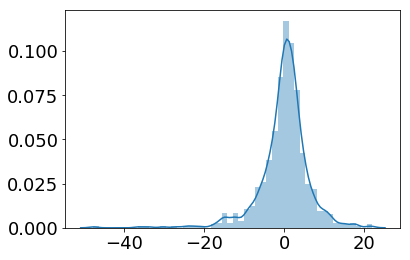

In [531]:
sns.distplot(multi_resid);

In [533]:
stats.shapiro(multi_resid)

(0.8817476034164429, 2.15951130343577e-23)

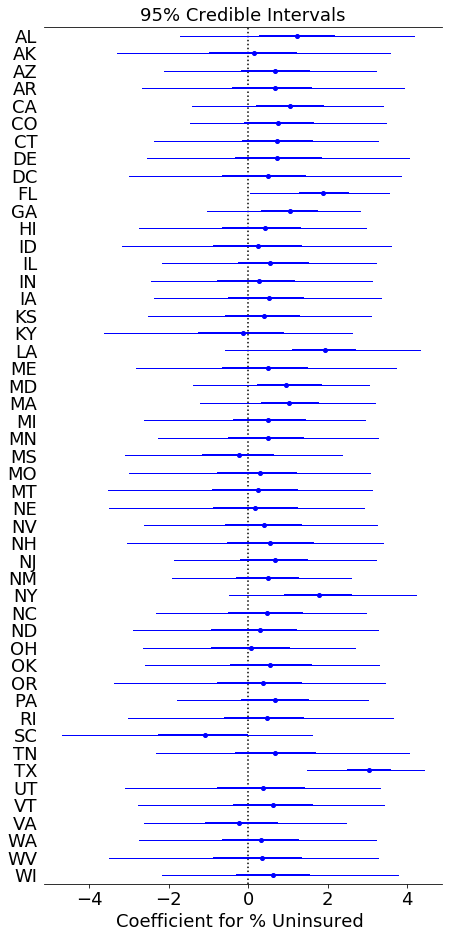

In [521]:
plt.figure(figsize=(6,14))
forestplot(multi_trace_4f, varnames=['beta3'], ylabels=us_states, xtitle='Coefficient for % Uninsured')
plt.rcParams.update({'font.size': 18})
plt.savefig('images/perc_unins_forestplot.png', bbox_inches='tight');

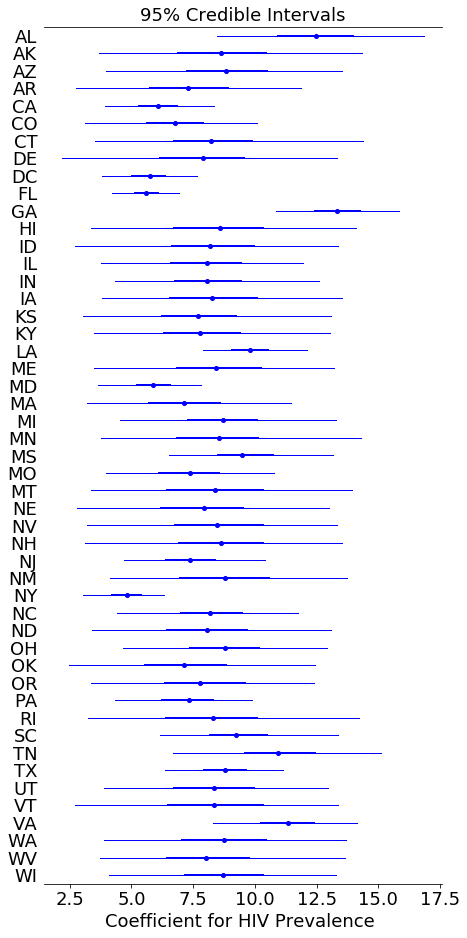

In [523]:
plt.figure(figsize=(6,14))
forestplot(multi_trace_4f, varnames=['beta1'], ylabels=us_states, xtitle='Coefficient for HIV Prevalence ')
plt.rcParams.update({'font.size': 18})
plt.savefig('images/hiv_prev_forestplot.png', bbox_inches='tight');

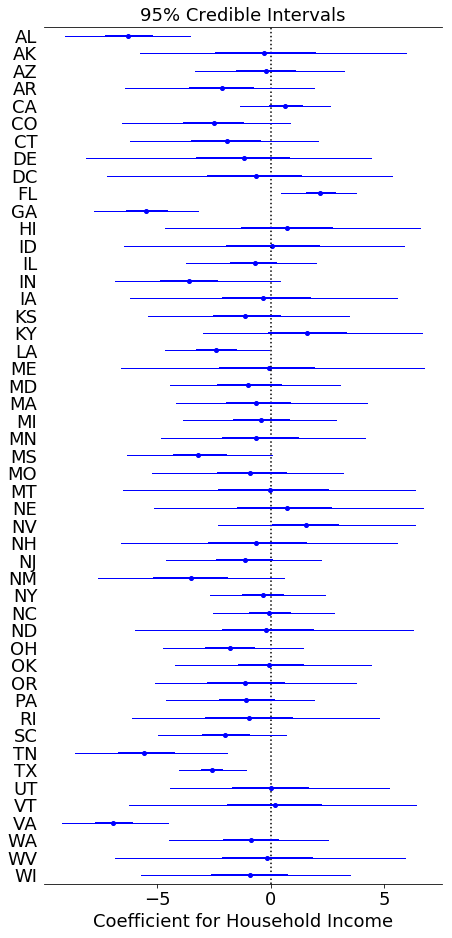

In [524]:
plt.figure(figsize=(6,14))
forestplot(multi_trace_4f, varnames=['beta4'], ylabels=us_states, xtitle='Coefficient for Household Income')
plt.rcParams.update({'font.size': 18})
plt.savefig('images/log_house_income_forestplot.png', bbox_inches='tight');